In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("fetal_health.csv")
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [5]:
df['fetal_health'].value_counts()

fetal_health
1.0    1655
2.0     295
3.0     176
Name: count, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [7]:
df.shape[0]

2126

1. no missing values
2. three target classes

In [8]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [12]:
for i in df.columns:
    print(i)
    print(df[i].nunique())

baseline value
48
accelerations
20
fetal_movement
102
uterine_contractions
16
light_decelerations
16
severe_decelerations
2
prolongued_decelerations
6
abnormal_short_term_variability
75
mean_value_of_short_term_variability
57
percentage_of_time_with_abnormal_long_term_variability
87
mean_value_of_long_term_variability
249
histogram_width
154
histogram_min
109
histogram_max
86
histogram_number_of_peaks
18
histogram_number_of_zeroes
9
histogram_mode
88
histogram_mean
103
histogram_median
95
histogram_variance
133
histogram_tendency
3
fetal_health
3


In [17]:
df['uterine_contractions'].value_counts()

uterine_contractions
0.000    332
0.005    290
0.004    244
0.006    231
0.007    216
0.003    212
0.008    160
0.002    160
0.001    118
0.009     82
0.010     49
0.011     16
0.012     11
0.013      2
0.014      2
0.015      1
Name: count, dtype: int64

In [30]:
cat_cols=['severe_decelerations', 'prolongued_decelerations', 'histogram_tendency', 'histogram_number_of_zeroes']
target_cols=['fetal_health']
num_cols = [col for col in df.columns if col not in cat_cols+target_cols]
num_cols

['baseline value',
 'accelerations',
 'fetal_movement',
 'uterine_contractions',
 'light_decelerations',
 'abnormal_short_term_variability',
 'mean_value_of_short_term_variability',
 'percentage_of_time_with_abnormal_long_term_variability',
 'mean_value_of_long_term_variability',
 'histogram_width',
 'histogram_min',
 'histogram_max',
 'histogram_number_of_peaks',
 'histogram_mode',
 'histogram_mean',
 'histogram_median',
 'histogram_variance']

In [31]:
df.shape

(2126, 22)

In [32]:
len(num_cols)

17

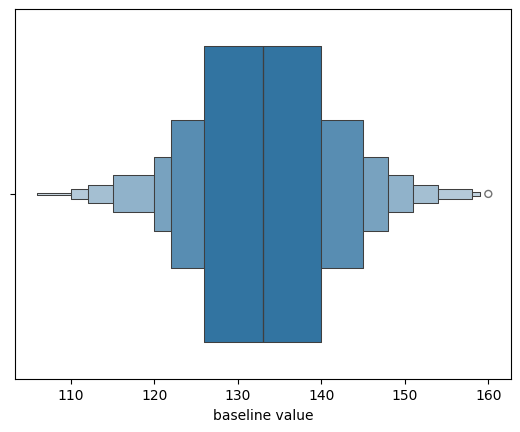

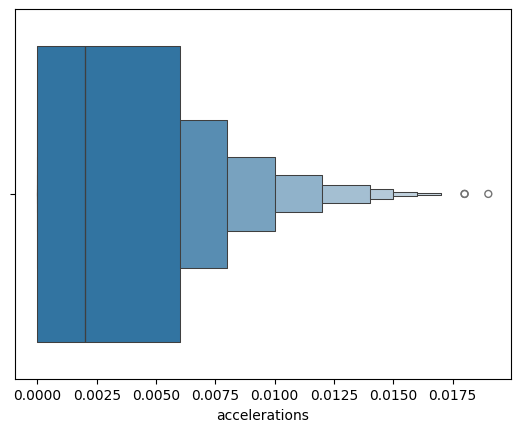

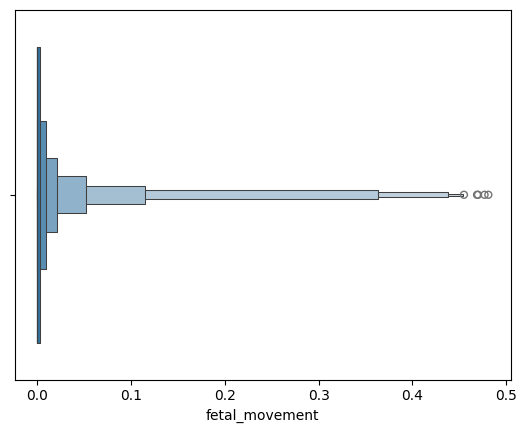

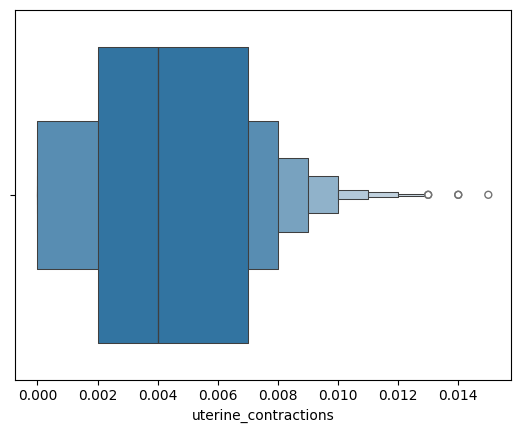

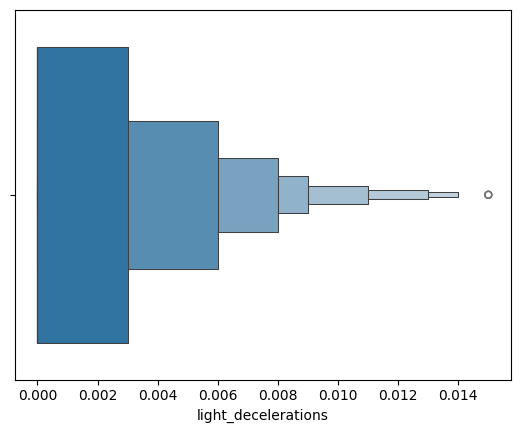

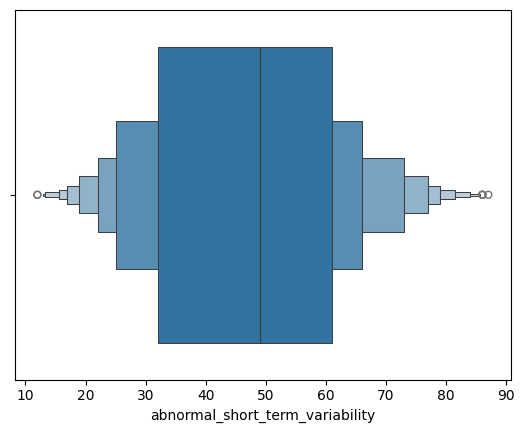

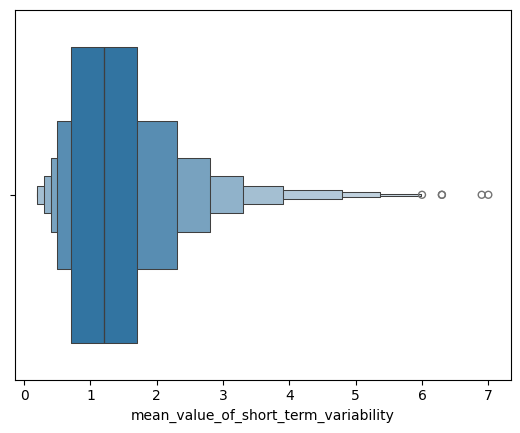

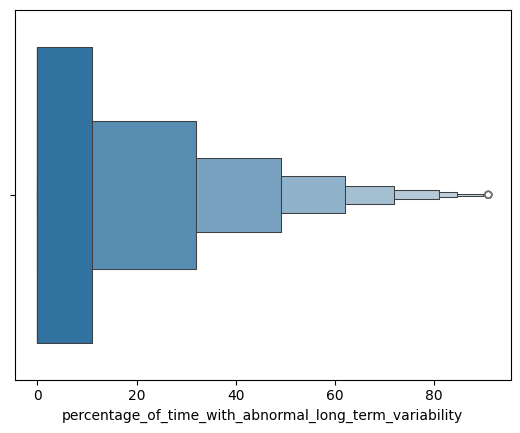

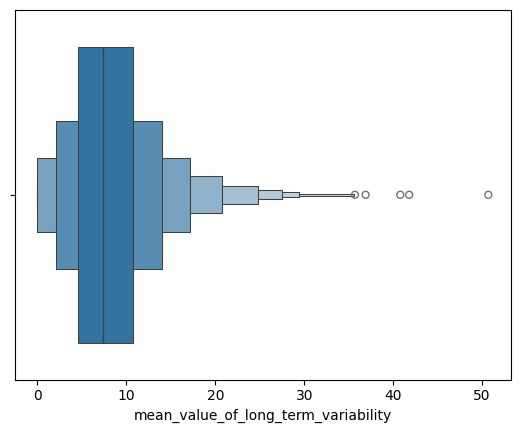

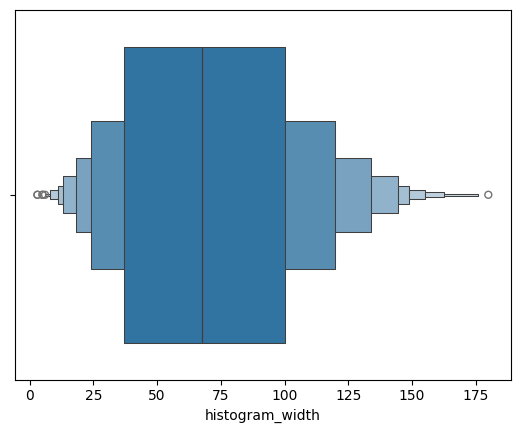

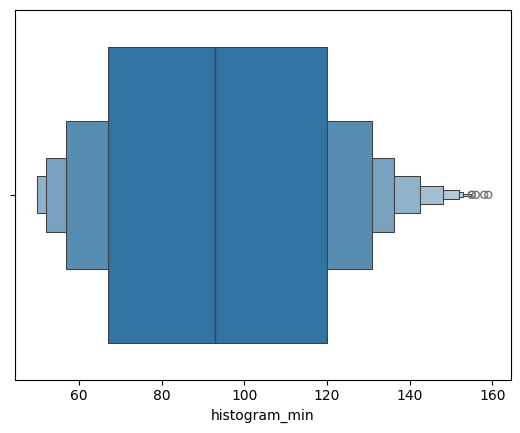

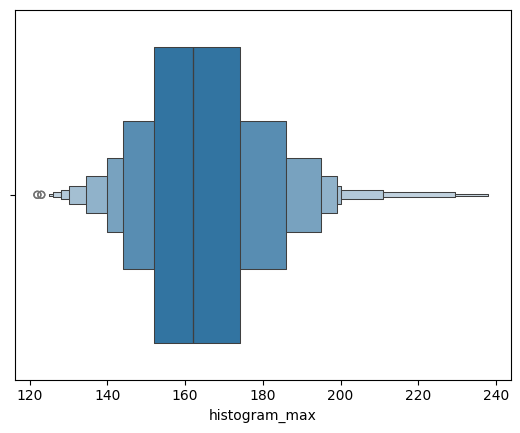

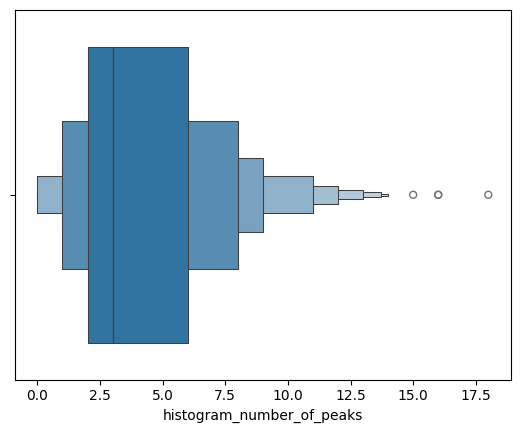

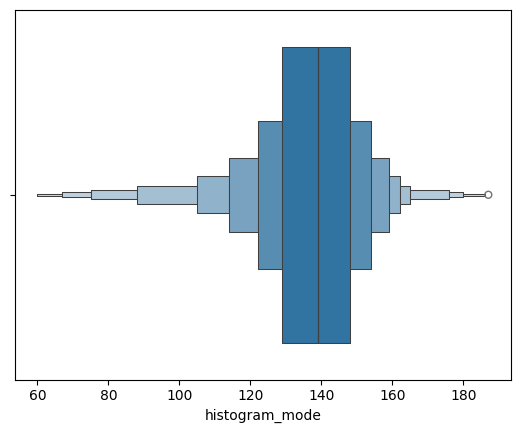

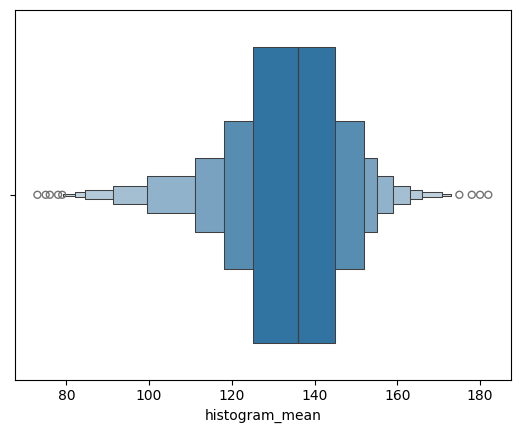

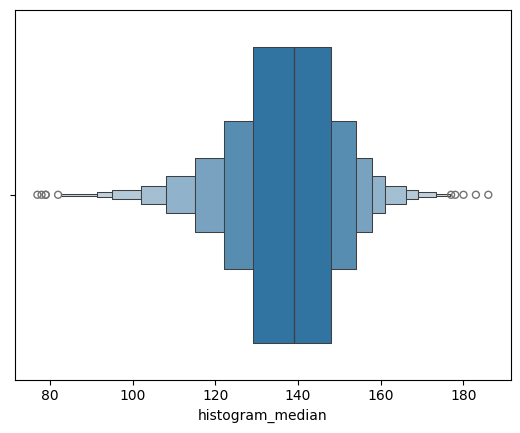

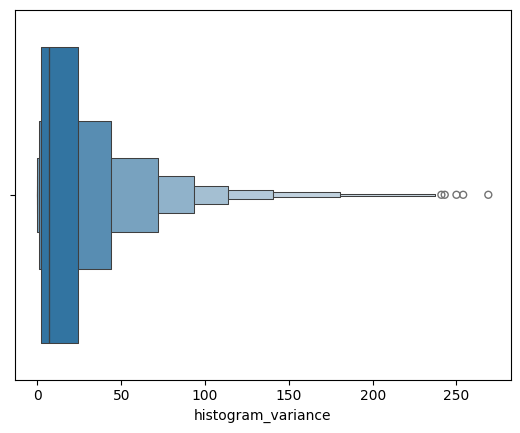

In [33]:
for i in num_cols: 
    plt.figure()
    sns.boxenplot(data=df, x=i)


In [34]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


accelerations, fetal_movement, histogram_number_of_zeroes, light_deceleration needs further investigation

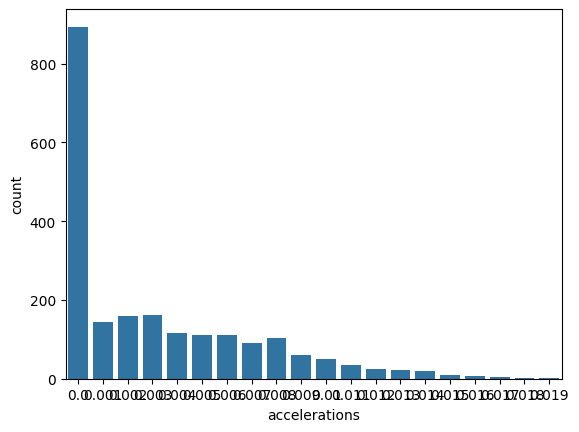

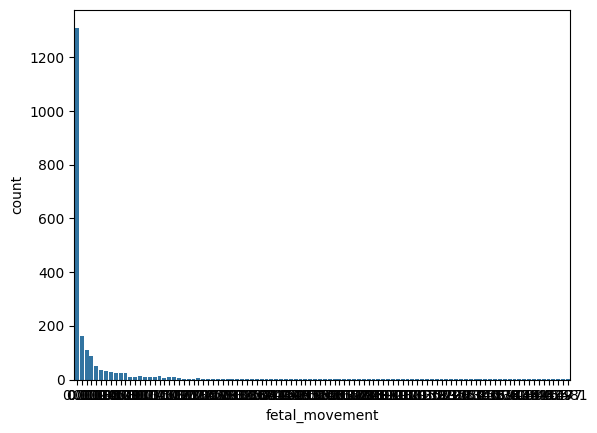

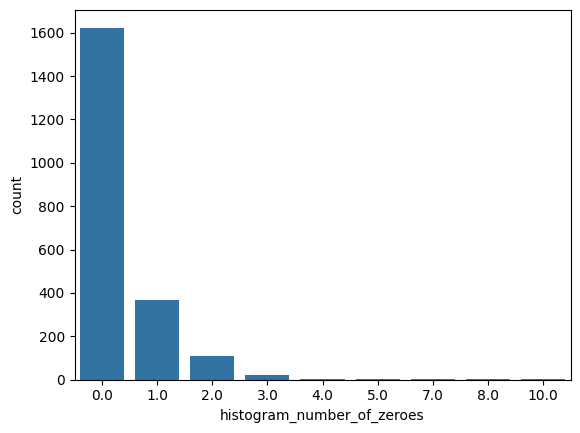

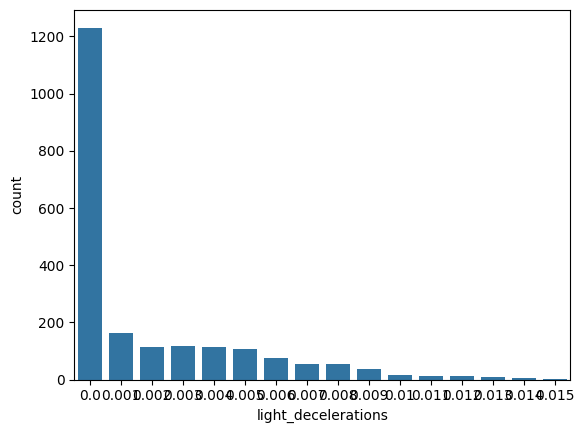

In [29]:
#for i in ['accelerations', 'fetal_movement', 'histogram_number_of_zeroes', 'light_decelerations']:
#    plt.figure()
#    sns.countplot(data=df, x=i)

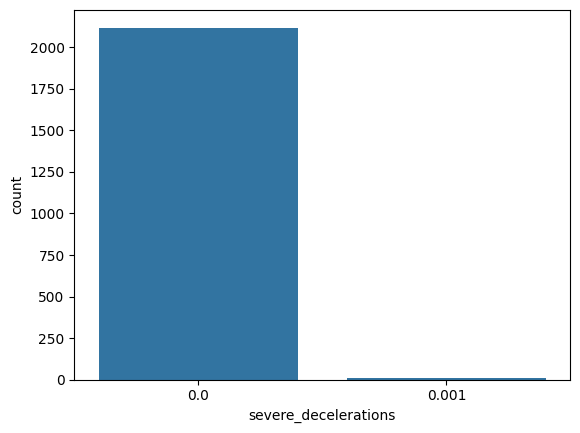

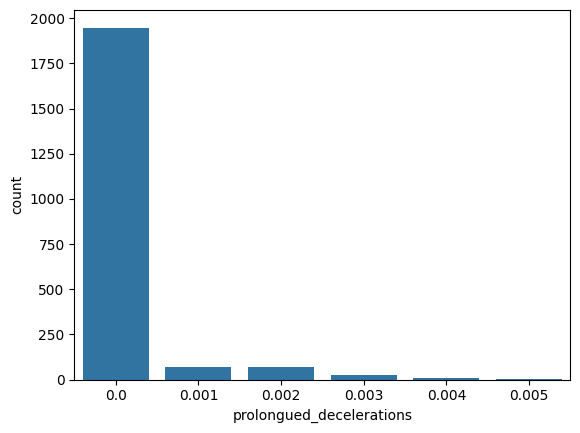

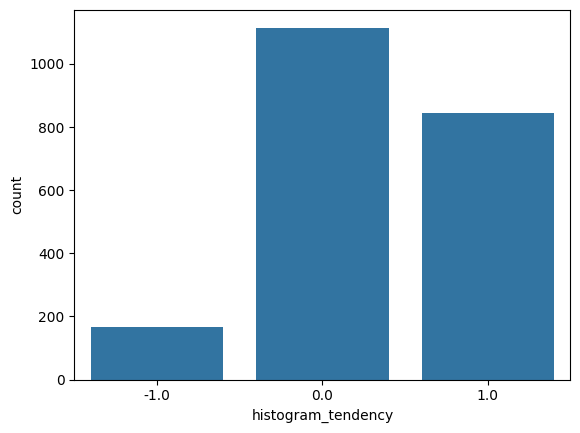

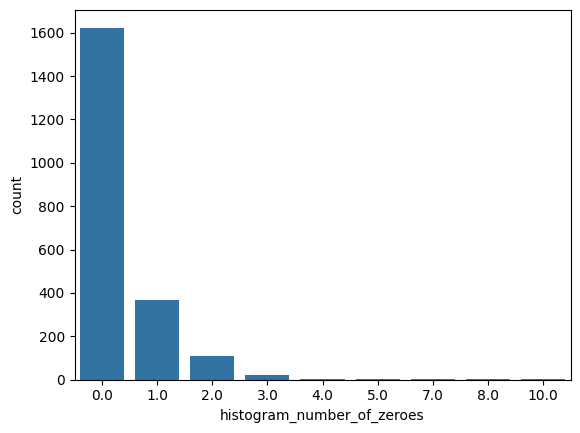

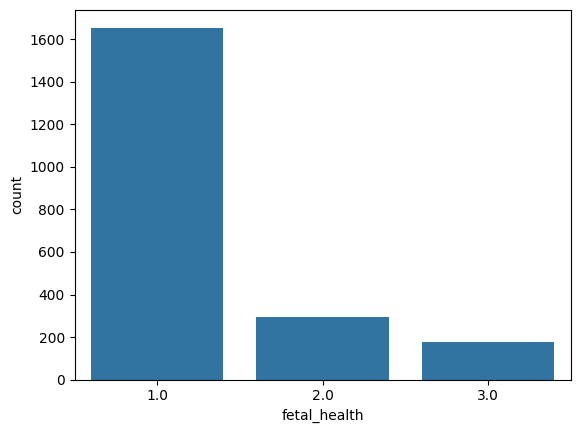

In [35]:
for i in cat_cols+target_cols:
    plt.figure()
    sns.countplot(data=df, x=i)
    

target variable is multiclass - with majority belonging to class = 1

bivariate_eda

<Axes: >

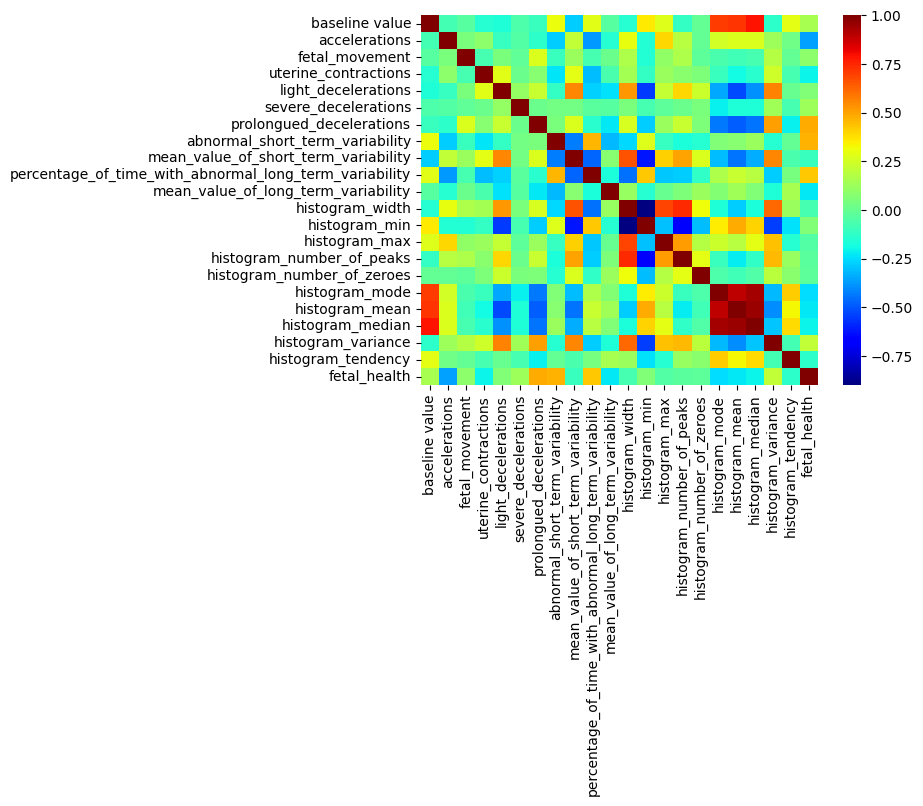

In [39]:
df_corr=df.corr()
sns.heatmap(df_corr, cmap='jet')

fetal health shows correlation with accelerations and histogram features

In [40]:
df_cat=pd.get_dummies(df, columns=cat_cols)
df_cat.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,...,histogram_tendency_1.0,histogram_number_of_zeroes_0.0,histogram_number_of_zeroes_1.0,histogram_number_of_zeroes_2.0,histogram_number_of_zeroes_3.0,histogram_number_of_zeroes_4.0,histogram_number_of_zeroes_5.0,histogram_number_of_zeroes_7.0,histogram_number_of_zeroes_8.0,histogram_number_of_zeroes_10.0
0,120.0,0.000,0.0,0.000,0.000,73.0,0.5,43.0,2.4,64.0,...,True,True,False,False,False,False,False,False,False,False
1,132.0,0.006,0.0,0.006,0.003,17.0,2.1,0.0,10.4,130.0,...,False,False,True,False,False,False,False,False,False,False
2,133.0,0.003,0.0,0.008,0.003,16.0,2.1,0.0,13.4,130.0,...,False,False,True,False,False,False,False,False,False,False
3,134.0,0.003,0.0,0.008,0.003,16.0,2.4,0.0,23.0,117.0,...,True,True,False,False,False,False,False,False,False,False
4,132.0,0.007,0.0,0.008,0.000,16.0,2.4,0.0,19.9,117.0,...,True,True,False,False,False,False,False,False,False,False


model building

In [42]:
X=df.drop(columns=['fetal_health'])
y=df['fetal_health']

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
col_list=list(X_train.columns)
Scaler=StandardScaler()

X_train_scaled=Scaler.fit_transform(X_train)
X_test_scaled=Scaler.transform(X_test)

<Axes: >

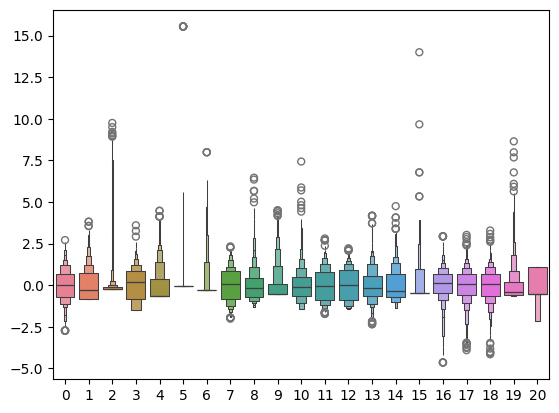

In [49]:
sns.boxenplot(data = X_train_scaled)

In [53]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train_scaled, y_train)
y_pred=lr.predict(X_test_scaled)
y_pred

array([1., 1., 1., 1., 1., 3., 1., 3., 1., 2., 1., 3., 1., 1., 1., 2., 1.,
       1., 2., 1., 1., 1., 3., 1., 1., 3., 3., 2., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 3., 2., 2., 1., 2., 1., 1., 1., 2., 1., 2., 1., 1., 1.,
       1., 2., 2., 2., 1., 1., 1., 2., 1., 2., 1., 1., 1., 1., 1., 2., 1.,
       1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 2., 1., 1., 1., 2., 3., 1., 1., 2., 2., 1., 2., 1.,
       1., 2., 1., 2., 1., 1., 3., 2., 2., 2., 1., 2., 1., 3., 1., 1., 2.,
       3., 1., 1., 1., 1., 1., 3., 3., 1., 1., 1., 3., 1., 1., 1., 2., 1.,
       1., 1., 2., 2., 2., 1., 3., 1., 3., 1., 1., 1., 1., 1., 1., 1., 2.,
       1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 1., 1., 2., 1., 2., 1.,
       1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1.,
       1., 3., 2., 1., 1., 1., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2.,
       1., 1., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [60]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
print('accuracy: ', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

accuracy:  0.8802816901408451
              precision    recall  f1-score   support

         1.0       0.94      0.93      0.94       333
         2.0       0.64      0.66      0.65        64
         3.0       0.76      0.76      0.76        29

    accuracy                           0.88       426
   macro avg       0.78      0.78      0.78       426
weighted avg       0.88      0.88      0.88       426



In [61]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train_scaled, y_train)
y_pred_rf=rf.predict(X_test_scaled)

In [67]:
print('RF accuracy: ', accuracy_score(y_test, y_pred_rf))
print('RF precision: ', precision_score(y_test, y_pred_rf, average='macro'))
print('RF recall: ', recall_score(y_test, y_pred_rf, average='macro'))

print(classification_report(y_test, y_pred_rf))

RF accuracy:  0.8802816901408451
RF precision:  0.7781871217645776
RF recall:  0.782934874529702
              precision    recall  f1-score   support

         1.0       0.96      0.98      0.97       333
         2.0       0.89      0.78      0.83        64
         3.0       0.90      0.93      0.92        29

    accuracy                           0.95       426
   macro avg       0.92      0.90      0.91       426
weighted avg       0.95      0.95      0.95       426



In [69]:
from sklearn.model_selection import GridSearchCV

parameters = { 'n_estimators': [100,150, 200,500,700,900],'max_features': ['auto', 'sqrt', 'log2'],'max_depth' : [4,6,8,12,14,16]}
cv=GridSearchCV(rf, param_grid=parameters, cv=5)
cv.fit(X_train_scaled, y_train)
cv.best_params_

c:\Users\voraha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\voraha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\voraha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\voraha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\

{'max_depth': 12, 'max_features': 'log2', 'n_estimators': 200}

In [70]:
rfb=RandomForestClassifier(**cv.best_params_)
rfb.fit(X_train_scaled, y_train)
y_pred_rfb=rfb.predict(X_test_scaled)

print('RF accuracy: ', accuracy_score(y_test, y_pred_rfb))
print('RF precision: ', precision_score(y_test, y_pred_rfb, average='macro'))
print('RF recall: ', recall_score(y_test, y_pred_rfb, average='macro'))

print(classification_report(y_test, y_pred_rfb))

RF accuracy:  0.9483568075117371
RF precision:  0.9182072829131652
RF recall:  0.8980888215802009
              precision    recall  f1-score   support

         1.0       0.96      0.98      0.97       333
         2.0       0.89      0.78      0.83        64
         3.0       0.90      0.93      0.92        29

    accuracy                           0.95       426
   macro avg       0.92      0.90      0.91       426
weighted avg       0.95      0.95      0.95       426



In [83]:
importances=pd.Series(rfb.feature_importances_, index=X_train.columns)
importances.sort_values(ascending=True, inplace=True)

<Axes: >

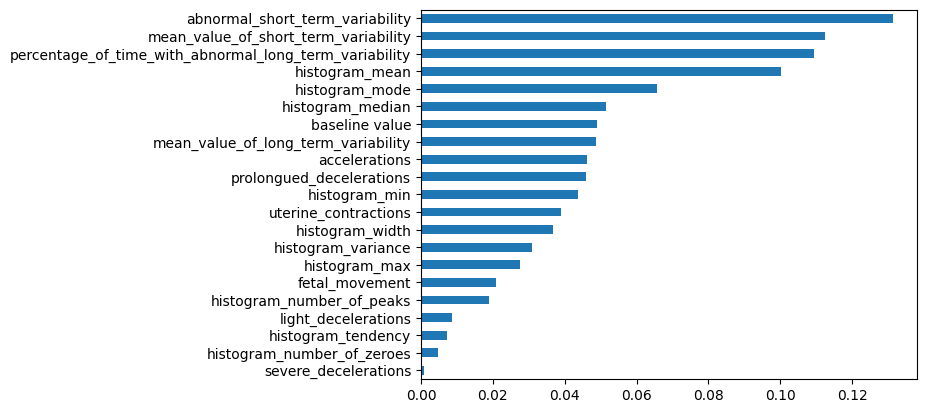

In [84]:
importances.plot.barh()